# Sales Data Analysis

This notebook performs exploratory data analysis (EDA) on sales data. It includes data cleaning, visualization, and key business insights.

In [3]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

sns.set(style="whitegrid")  # Set Seaborn style

## 1. Load and Preview Data

In [4]:
df = pd.read_csv("SalesData_1000.csv")
df.head()

,OrderID,CustomerID,CustomerName,Gender,Age,ProductID,ProductName,Category,Quantity,Price,Total,OrderDate,City
0,O10000,C4863,Tanya Wilcox,Female,54.0,P005,T-shirt,Clothing,4.0,15.0,60.00,2025-02-21,NaN
1,O10001,C9185,Robin Adams,male,30.0,P009,Backpack,Accessories,4.0,35.0,140.00,2025-04-11,NaN
2,O10002,C3676,Lindsay Carney,Fmale,NaN,P003,Yoga Mat,Sports,NaN,20.0,NaN,2025-01-11,NaN
3,O10003,C5222,Alyssa Cherry,Fmale,48.0,P001,Wireless Mouse,Electronics,2.0,25.99,51.98,2025-01-02,NaN
4,O10004,C9821,Maria Miller,male,NaN,P006,Water Bottle,Sports,1.0,12.0,12.00,2025-02-17,NaN


## 2. Data Overview

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 13 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   OrderID       1000 non-null   object 
 1   CustomerID    1000 non-null   object 
 2   CustomerName  1000 non-null   object 
 3   Gender        1000 non-null   object 
 4   Age           497 non-null    float64
 5   ProductID     1000 non-null   object 
 6   ProductName   1000 non-null   object 
 7   Category      1000 non-null   object 
 8   Quantity      802 non-null    float64
 9   Price         1000 non-null   object 
 10  Total         802 non-null    float64
 11  OrderDate     1000 non-null   object 
 12  City          359 non-null    object 
dtypes: float64(3), object(10)
memory usage: 101.7+ KB


In [6]:
df.describe(include='all')

,OrderID,CustomerID,CustomerName,Gender,Age,ProductID,ProductName,Category,Quantity,Price,Total,OrderDate,City
count,1000,1000,1000,1000,497.000000,1000,1000,1000,802.000000,1000,802.000000,1000,359
unique,957,948,995,4,NaN,10,10,6,NaN,18,NaN,181,350
top,O10006,C1118,James Jones,male,NaN,P007,USB Cable,Electronics,NaN,5.99,NaN,2025-01-23,New David
freq,4,3,2,262,NaN,119,119,327,NaN,115,NaN,13,2
mean,NaN,NaN,NaN,NaN,41.380282,NaN,NaN,NaN,3.635910,NaN,75.263416,NaN,NaN
std,NaN,NaN,NaN,NaN,14.114818,NaN,NaN,NaN,6.441098,NaN,157.692549,NaN,NaN
min,NaN,NaN,NaN,NaN,18.000000,NaN,NaN,NaN,1.000000,NaN,3.250000,NaN,NaN
25%,NaN,NaN,NaN,NaN,29.000000,NaN,NaN,NaN,2.000000,NaN,18.500000,NaN,NaN
50%,NaN,NaN,NaN,NaN,41.000000,NaN,NaN,NaN,3.000000,NaN,42.500000,NaN,NaN
75%,NaN,NaN,NaN,NaN,53.000000,NaN,NaN,NaN,4.000000,NaN,80.000000,NaN,NaN


## 3. Data Cleaning

In [7]:
# Convert OrderDate to datetime format
df['OrderDate'] = pd.to_datetime(df['OrderDate'])

# Clean Price column
df['Price'] = df['Price'].astype(str).str.replace('$', '', regex=False).astype(float)

In [8]:
# Fill missing values
df['Age'] = df['Age'].fillna(df['Age'].median())
df['Quantity'] = df['Quantity'].fillna(1)
df['City'] = df['City'].fillna('Unknown')

In [9]:
# Standardize gender and remove typos
df['Gender'] = df['Gender'].str.capitalize()
df['Gender'] = df['Gender'].replace({'Fmale': 'Female'})

In [10]:
# Add Total column
df['Total'] = df['Quantity'] * df['Price']

In [11]:
# Drop duplicates
df = df.drop_duplicates()

### Missing Values Overview

In [12]:
df.isnull().sum()

OrderID         0
CustomerID      0
CustomerName    0
Gender          0
Age             0
ProductID       0
ProductName     0
Category        0
Quantity        0
Price           0
Total           0
OrderDate       0
City            0
dtype: int64

## 4. Visual Analysis

### Total Sales by Category

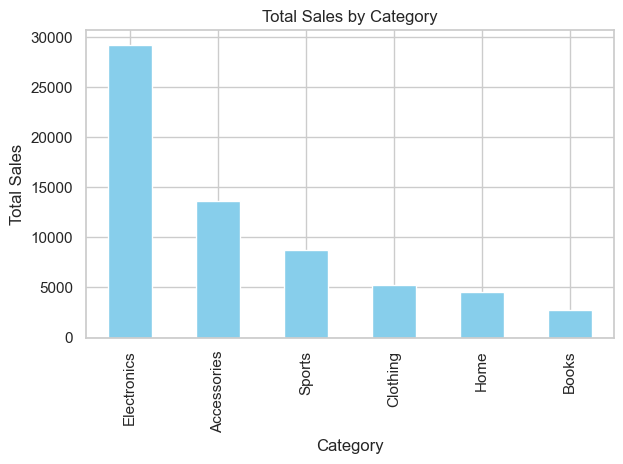

In [13]:
df.groupby('Category')['Total'].sum().sort_values(ascending=False).plot(kind='bar', color='skyblue')
plt.title("Total Sales by Category")
plt.ylabel("Total Sales")
plt.xlabel("Category")
plt.tight_layout()
plt.show()

### Top 10 Cities by Sales

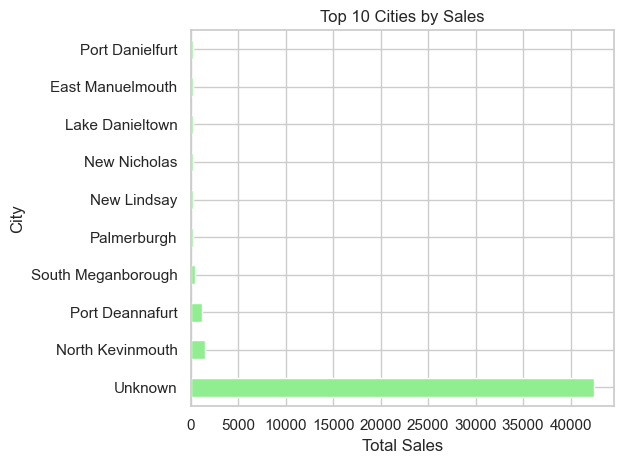

In [14]:
df.groupby('City')['Total'].sum().sort_values(ascending=False).head(10).plot(kind='barh', color='lightgreen')
plt.title("Top 10 Cities by Sales")
plt.xlabel("Total Sales")
plt.ylabel("City")
plt.tight_layout()
plt.show()

### Sales by Gender

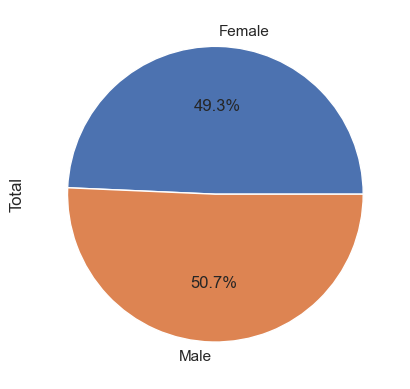

In [22]:

df.groupby('Gender')['Total'].sum().plot(kind='pie',autopct='%1.1f%%')
plt.show()

### Age Distribution

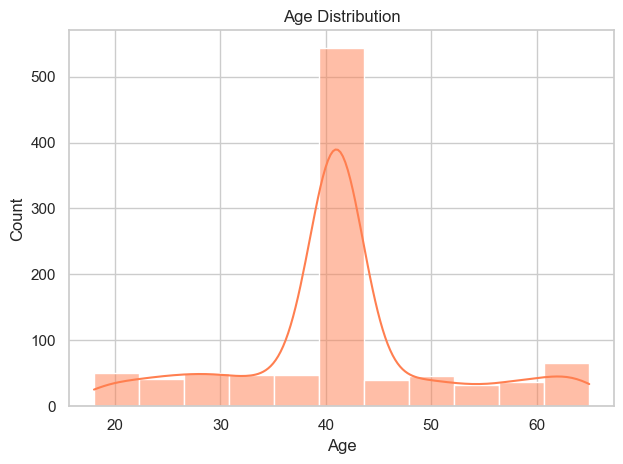

In [16]:
sns.histplot(df['Age'], kde=True, color='coral')
plt.title("Age Distribution")
plt.tight_layout()
plt.show()

### Monthly Sales Trend

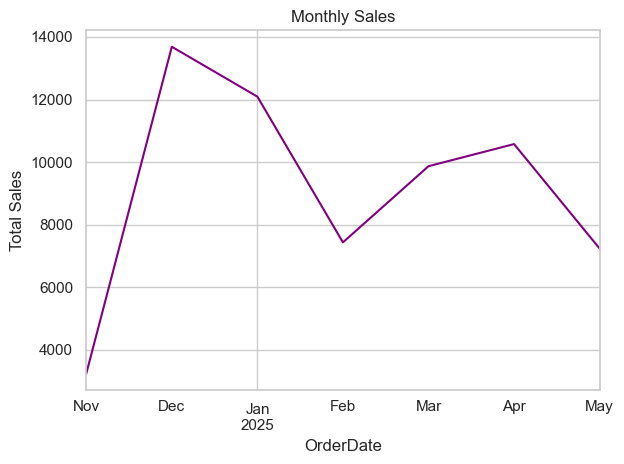

In [18]:
df.set_index('OrderDate').resample('ME')['Total'].sum().plot(title='Monthly Sales', color='purple')
plt.ylabel("Total Sales")
plt.tight_layout()
plt.show()

## 5. Key Business Metrics

### Top 10 Customers by Lifetime Value

In [19]:
df.groupby('CustomerID')['Total'].sum().sort_values(ascending=False).head(10)

CustomerID
C3337    2975.00
C5903    1820.00
C5994    1500.00
C6419    1299.50
C6788    1247.52
C6601     465.00
C3275     425.29
C8215     389.35
C1281     299.95
C9269     299.95
Name: Total, dtype: float64

### Average Order Value

In [20]:
df['Total'].mean()

np.float64(64.14968)

## 6. Export Cleaned Data

In [21]:
df.to_csv("Cleaned_SalesData.csv", index=False)

## 7. Conclusion

- Highest sales are concentrated in certain categories and cities.
- Gender distribution is roughly balanced.
- Customers' ages are mostly centered around the median age.
- Seasonal trends in sales can help with inventory planning.